<h2>Name: K. D. S. D. Kuruppu</h2>
<h2>Index no: 190338C</h2>

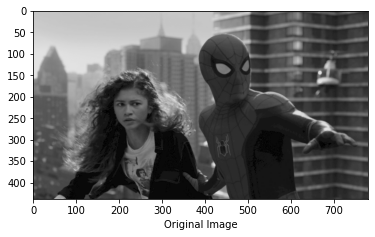

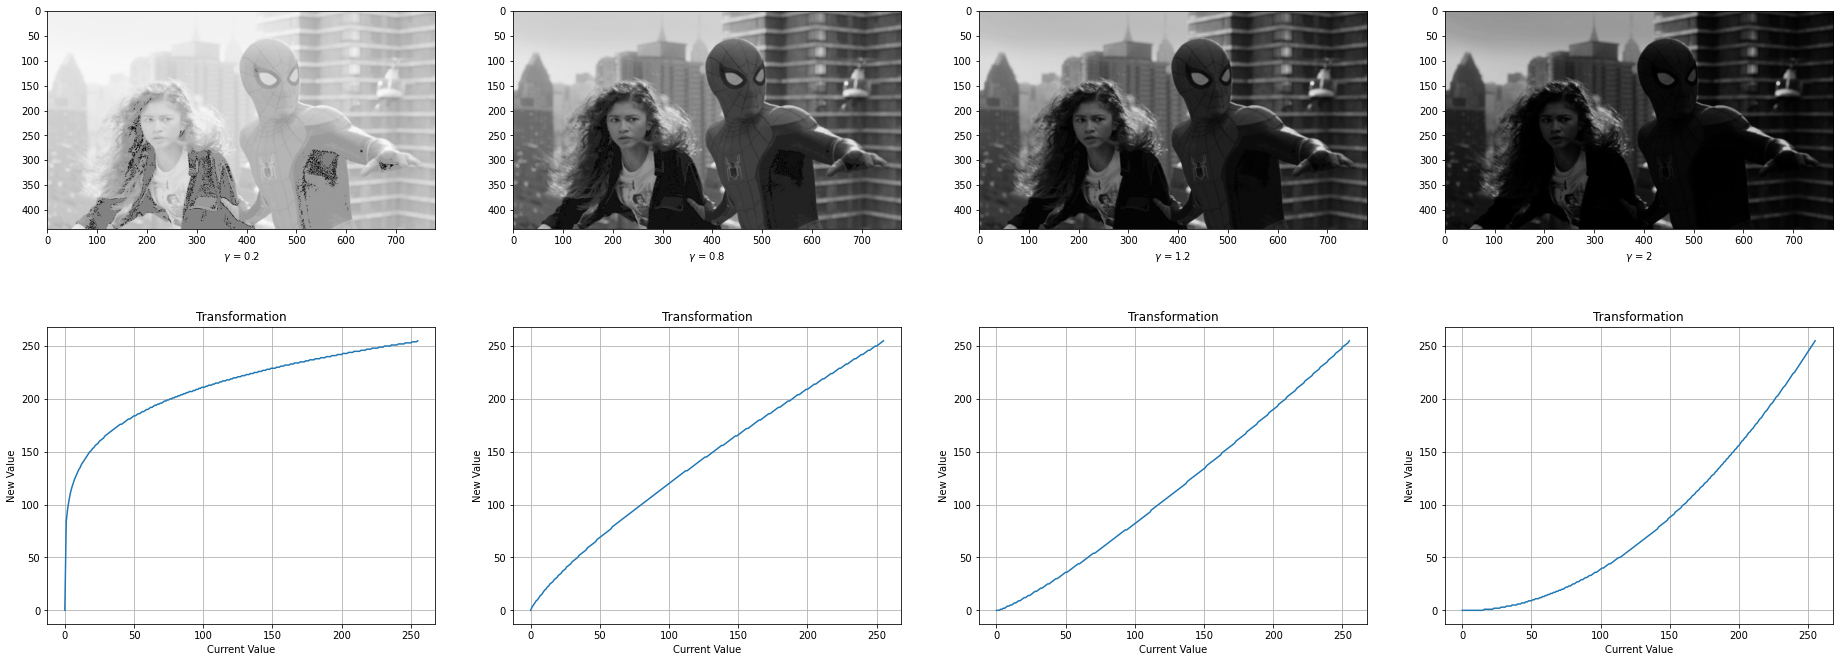

In [41]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

gamma = [0.2, 0.8, 1.2, 2]

spider_img = cv.imread(r'Images\spider.png', cv.IMREAD_GRAYSCALE)
spider_img_rgb = cv.cvtColor(spider_img, cv.COLOR_BGR2RGB)

#original 
plt.imshow(spider_img_rgb)
plt.xlabel("Original Image")

#gamma correction
fig, ax = plt.subplots(2, 4, figsize=(32, 12))

for i in range(len(gamma)):
    transformation = np.array([(p/255)**(gamma[i]) * 255 for p in range(256)]).astype(np.uint8)

    transformed_img = cv.LUT(spider_img_rgb, transformation)

    ax[0][i].imshow(transformed_img)
    ax[0][i].set_xlabel(f"$\gamma$ = {gamma[i]}")

    ax[1][i].plot(transformation)
    ax[1][i].set_xlabel("Current Value")
    ax[1][i].set_ylabel("New Value")
    ax[1][i].set_title("Transformation")
    ax[1][i].grid()






Text(0.5, 1.0, 'Transformation')

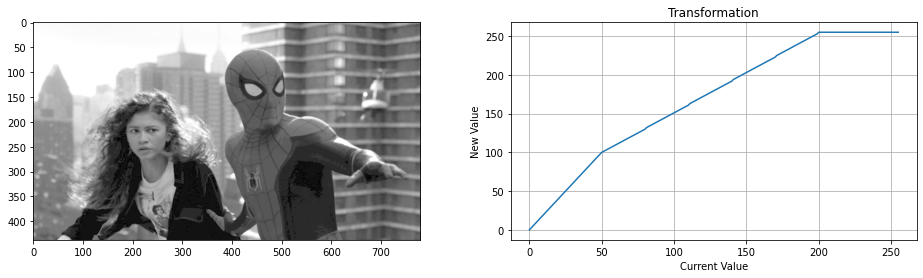

In [40]:
t1 = np.linspace(0, 100, 51)
t2 = np.linspace(101, 255, 150)
t3 = np.linspace(255, 255, 55)

transform_2 = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)

transformed_img_2 = cv.LUT(spider_img_rgb, transform_2)

fig_2,ax_2 = plt.subplots(1, 2, figsize=(16, 4))

ax_2[0].imshow(transformed_img_2)
ax_2[1].plot(transform_2)
ax_2[1].grid()
ax_2[1].set_xlabel("Current Value")
ax_2[1].set_ylabel("New Value")
ax_2[1].set_title("Transformation")

Text(0, 0.5, 'Count')

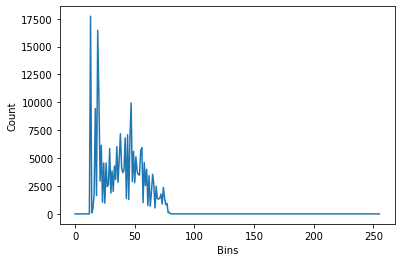

In [84]:
shells_img = cv.imread(r"Images\shells.tif", cv.IMREAD_GRAYSCALE)

shells_img_rgb = cv.cvtColor(shells_img, cv.COLOR_BGR2RGB)
hist = cv.calcHist([shells_img_rgb], [0], None, [256], [0,256])

plt.plot(hist)
plt.xlabel("Bins")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

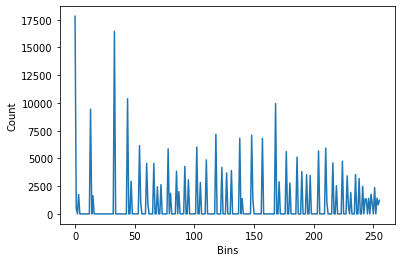

In [86]:
equalised_img = cv.equalizeHist(shells_img)
equalised_hist = cv.calcHist([equalised_img], [0], None, [256], [0,256])

plt.plot(equalised_hist)
plt.xlabel("Bins")
plt.ylabel("Count")

Text(0.5, 1.0, 'Image after Histogram equalization')

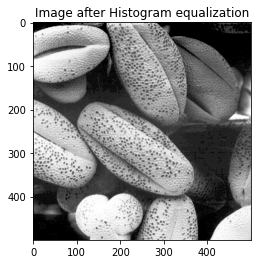

In [91]:
equalised_img_rgb = cv.cvtColor(equalised_img, cv.COLOR_BGR2RGB)

plt.imshow(equalised_img_rgb)
plt.title("Image after Histogram equalization")

Text(0.5, 1.0, 'Saturated Image')

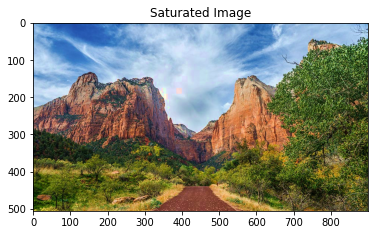

In [148]:
zion_img = cv.imread(r"Images\zion_pass.jpg")

zion_hsv = cv.cvtColor(zion_img , cv.COLOR_BGR2HSV)

offset = 30

zion_hsv[:,:,1][zion_hsv[:,:,1] <= 255-offset] += offset
zion_hsv[:,:,1][zion_hsv[:,:,1] > 255-offset+1] = 255

zion_img_saturated = cv.cvtColor(zion_hsv, cv.COLOR_HSV2RGB)

plt.imshow(zion_img_saturated)
plt.title("Saturated Image")

Text(0.5, 1.0, 'Image with hue changed')

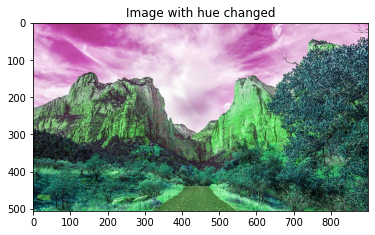

In [147]:
zion_hsv = cv.cvtColor(zion_img , cv.COLOR_BGR2HSV)

offset = 50

zion_hsv[:,:,0][zion_hsv[:,:,0] <= 255-offset] += offset
zion_hsv[:,:,0][zion_hsv[:,:,0] > 255-offset+1] = 255

zion_img_hue = cv.cvtColor(zion_hsv, cv.COLOR_HSV2RGB)

plt.imshow(zion_img_hue)
plt.title("Image with hue changed")